<a href="https://colab.research.google.com/github/randiirwana/Web-prediksi-stroke/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install imbalanced-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)

from imblearn.over_sampling import SMOTE
import joblib

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

print("Jumlah data:", df.shape)
df.head()


Jumlah data: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:

df['bmi'] = df['bmi'].fillna(df['bmi'].median())


In [ ]:

le = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:

X = df.drop(columns=['stroke'])
y = df['stroke']

print("Jumlah kelas sebelum SMOTE:")
print(y.value_counts())


Jumlah kelas sebelum SMOTE:
stroke
0    4861
1     249
Name: count, dtype: int64


In [ ]:

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Jumlah kelas setelah SMOTE:")
print(pd.Series(y_res).value_counts())


Jumlah kelas setelah SMOTE:
stroke
1    4861
0    4861
Name: count, dtype: int64


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)


In [ ]:

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== HASIL EVALUASI RANDOM FOREST ===")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)


=== HASIL EVALUASI RANDOM FOREST ===
Accuracy : 0.9038560411311054
Precision: 0.865546218487395
Recall   : 0.9556701030927836
F1-score : 0.9083782459578638


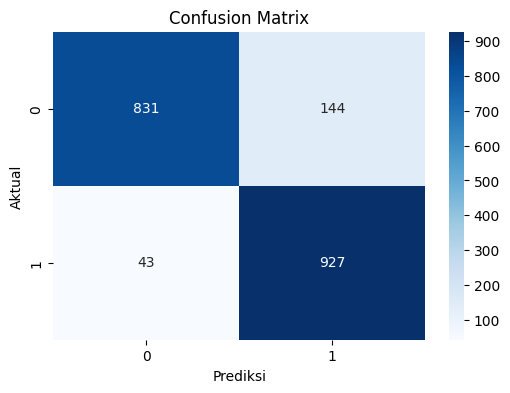

In [ ]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()


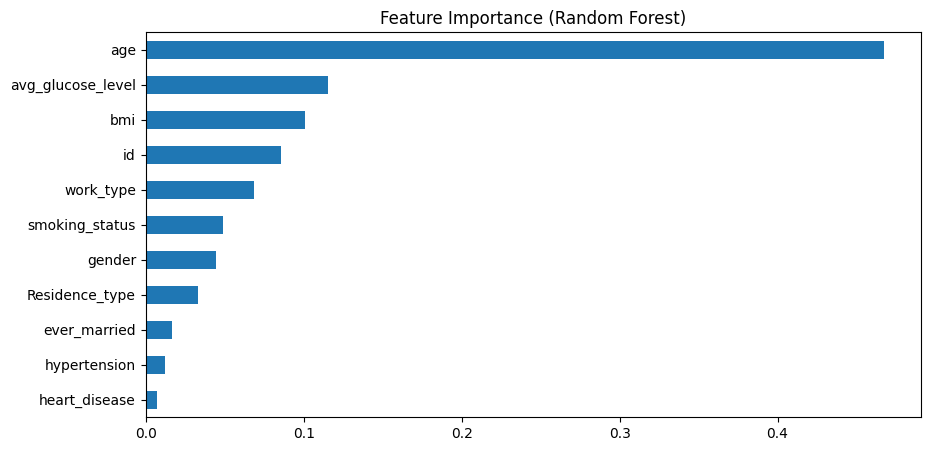

In [ ]:

plt.figure(figsize=(10,5))
imp = pd.Series(rf.feature_importances_, index=X.columns)
imp.sort_values().plot(kind="barh")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [ ]:

joblib.dump(rf, "stroke_rf_model.pkl")
joblib.dump(le, "label_encoder.pkl")

print("Model berhasil disimpan!")


Model berhasil disimpan!
